*ЗПШ-2021, сезон 29¾ :: "Как устроены случайности?"*
*zpsh@bochkarev.io*


# Занятие 1: модель для случайных событий. 

- классическое определение вероятности, частоты
- эксперименты с кубиками
- эксперименты с ~крокодилами~ черными и белыми шарами
- вероятностное пространство. Исходы, события. Элементы теории множеств
- пример с текстом

Можно также открыть для просмотра в [nbviewer](https://nbviewer.jupyter.org/github/alex-bochkarev/zpsh-21-probs/blob/main/1_probability.ipynb), или: [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alex-bochkarev/zpsh-21-probs/blob/master/1_probability.ipynb) 

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np  # мощная библиотека для всяких вычислений
from time import time  # для измерения времени
from tqdm.notebook import tqdm  # это progress-bar
# эти для рисования графиков:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [ ]:
# технический код -- чтобы бросание монеток выглядело красиво :)
# (не принципиально для понимания занятия.)

class dice:
    """Описывает кубик."""
    def __init__(self):
        self.Omega = [face for face in '⚀⚁⚂⚃⚄⚅']

    def roll(self):
        """Бросает кубик -- возвращает грань (равномено случайно)."""
        return np.random.choice(self.Omega)


class coin:
    """Описывает бросок монетки."""
    def __init__(self):
        self.Omega = ["H", "T"]

    def toss(self):
        """Бросает монетку -- возвращает `H` (орел) или `T` (решка), равномено случайно."""
        return np.random.choice(self.Omega)

## "Честная" монета
- эксперимент с двумя исходами, "орел" (**H**EADs) или "решка" (**T**AILs).

In [32]:
c = coin()
s = ''

In [48]:
s += c.toss()
s

'TTTTTHHHHHHTHTTH'

In [61]:
def toss_a_coin(NO_BATCHES=10, BATCH_SIZE=10):
    """Моделирует эксперимент по бросанию монетки.
    
    Бросает монетку `BATCH_SIZE` раз, выполняет этот эксперимент
    `NO_BATCHES` раз. 
    
    Возвращает список `heads_freq`, каждый элемент которого -- кумулятивная частота 
    (т.е., доля) "орлов" по итогам всех предыдущих экспериментов.
    """
    no_heads = 0
    heads_freq = []

    c = coin()
    for i in range(NO_BATCHES):
        for j in range(BATCH_SIZE):
            if c.toss() == "H":
                no_heads += 1
        heads_freq.append(no_heads / ((i+1)*BATCH_SIZE))
    
    return heads_freq

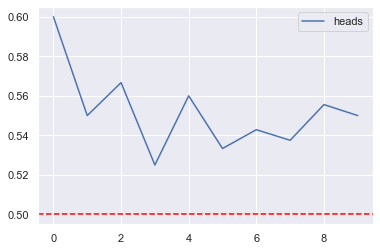

In [5]:
# по горизонтальной оси -- номер эксперимента,
# по вертикальной -- доля "орлов"
heads_freq = toss_a_coin()
fig = sns.lineplot([i for i in range(len(heads_freq))], heads_freq, label="heads")
fig.axhline(0.500, color='red', ls='--')

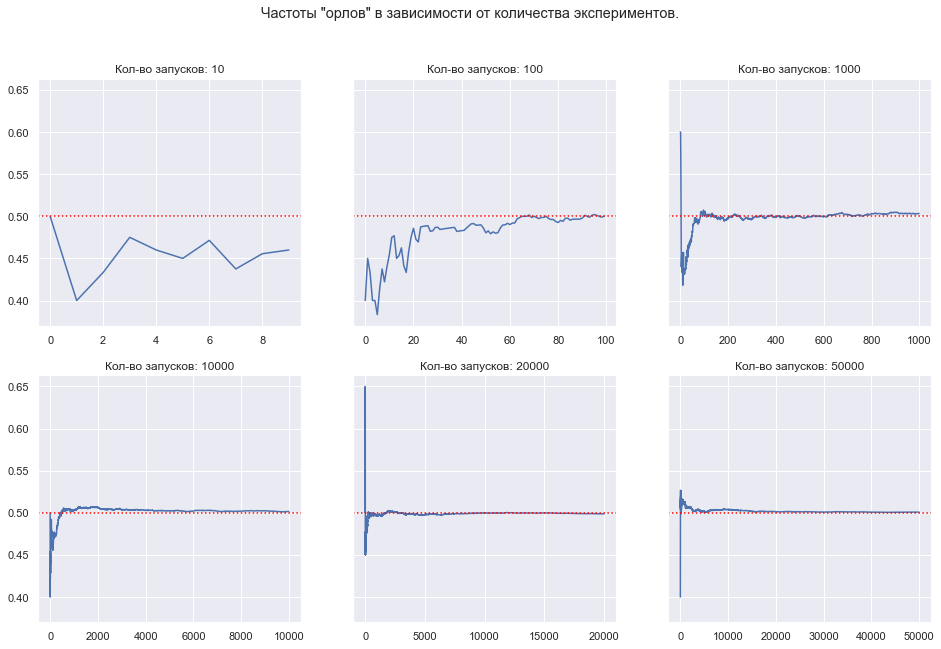

In [6]:
# тот же эксперимент, но повторенный несколько раз, для разного макс. количества 
# количества повторений (`NO_BATCHES`)
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(16,10)); ax = ax.flatten()
fig.suptitle('Частоты "орлов" в зависимости от количества экспериментов.')

for k, NB in enumerate([10, 100, 1000, 10000, 20000, 50000]):
    ax[k].set_title(f"Кол-во запусков: {NB}")
    heads_freq = toss_a_coin(NO_BATCHES=NB)
    
    sns.lineplot([i for i in range(len(heads_freq))], heads_freq, ax=ax[k])
    ax[k].axhline(0.500, color='red', ls='dotted')

In [7]:
print(f'"Долгосрочная доля" решек (на {len(heads_freq)*10:,} испытаний): {heads_freq[-1]:.4f}')

"Долгосрочная доля" решек (на 500,000 испытаний): 0.5008


## *ВОПРОС:* как описывать случайные события?

1. описание всех возможных исходов
2. "долгосрочные частоты" каждого варианта

Типа:
- $\Omega=\{H,T\}$ -- возможные исходы
- $p_H=p_T=1/2$

*что-то еще нужно?*

Давайте посмотрим чуть усложненный пример: бросание кубика.

<img src="./images/dice.png" width=100 heigth=100> 

In [49]:
d = dice()
s=''

In [60]:
s += d.roll()
s

'⚃⚀⚃⚄⚁⚀⚃⚁⚃⚀⚃'

In [10]:
def roll_a_die(NO_BATCHES=10, BATCH_SIZE=60):
   """Моделирует эксперимент по бросанию кубика.
    
    Бросает кубик `BATCH_SIZE` раз, выполняет этот эксперимент
    `NO_BATCHES` раз. 
    
    Возвращает список `freqs`, каждый элемент которого -- кумулятивная частота 
    (т.е., доля) каждого результата по итогам всех предыдущих экспериментов.
    
    E.g., freqs[t] будет состоять из 6 частот, кумулятивно по шаг t.
    """ 
    c = dice()
    
    numbers = dict(zip(c.Omega, [0]*6))
    freqs = [0.0] * NO_BATCHES
    
    for i in range(NO_BATCHES):
        for j in range(BATCH_SIZE):
            numbers[c.roll()] += 1
            
        freqs[i] = [numbers[X] / ((i+1)*BATCH_SIZE) for X in numbers.keys()]
    
    return freqs

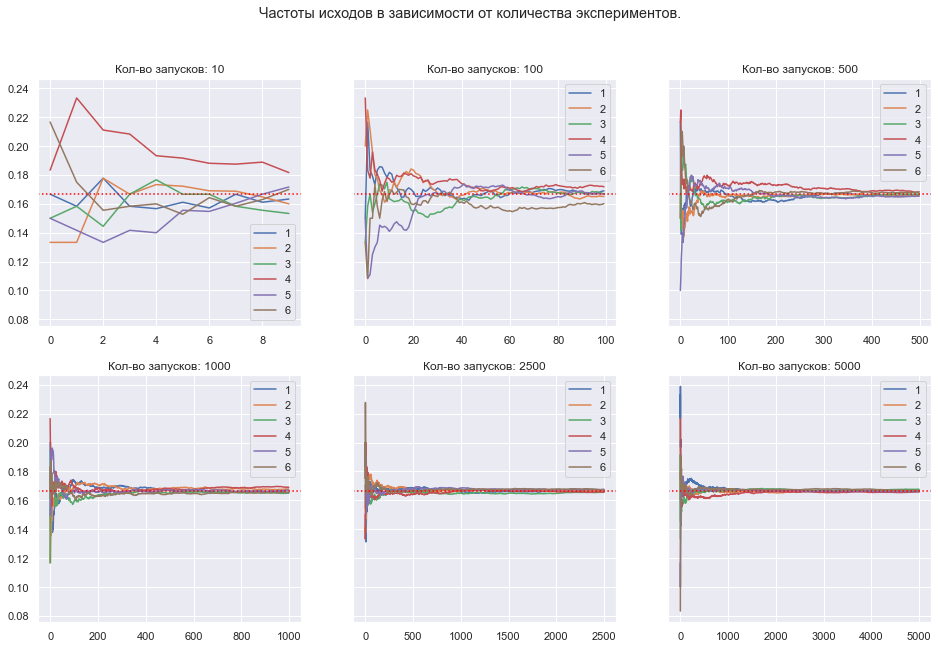

In [11]:
# график, аналогичный таким же для монеток.
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(16,10)); ax = ax.flatten()
fig.suptitle('Частоты исходов в зависимости от количества экспериментов.')

for k, NB in enumerate([10, 100, 500, 1000, 2500, 5000]):
    ax[k].set_title(f"Кол-во запусков: {NB}")
    freqs = roll_a_die(NO_BATCHES=NB)
    
    for i in range(6):
        sns.lineplot([j for j in range(NB)],
                     [freqs[b][i] for b in range(NB)],
                     ax=ax[k], label=f"{i+1}")
    ax[k].axhline(0.16667, color='red', ls='dotted')

In [12]:
print(f'"Долгосрочная доля" исходов (на {len(freqs)*60:,} испытаний): \n{freqs[-1]}')

"Долгосрочная доля" исходов (на 300,000 испытаний): 
[0.16708666666666666, 0.16648333333333334, 0.16766333333333333, 0.1658, 0.16607333333333332, 0.16689333333333334]


## Тестируем нашу "модель".
- $\Omega=$ {⚀, ⚁, ⚂, ⚃, ⚄, ⚅} -- возможные исходы
- $p_⚀=\ldots=p_⚅=1/6$ -- давайте думать о вероятности, как о "долгосрочных частотах".

**Вопросы на обсуждение:**

- чему равна вероятность "⚄"? почему?
- я выигрываю, если выброшу 4 или более. Какая вероятность выиграть?
- ... только если четные. Какая вероятность выиграть?
- ... только если четные, либо что угодно больше `4`? 

(**подсказка:** кажется, нужен "костыль")

## Как организовать математическую модель?

Нам на самом деле нужно три компоненты:
- все возможные *исходы*. $\Omega=$ {⚀, ⚁, ⚂, ⚃, ⚄, ⚅} -- куда же без них...  (*Какое-то непустое множество.*)
- все возможные *события*. $\mathcal{F}$ -- например, все подмножества $\Omega$. 
  + Мне не обязательно их перечислять, но надо понимать, что вероятность будет относиться именно к ним, а не ("только") к исходам.
  + Вообще, это какая-то коллекция подмножеств $\Omega$. *Какая?*
- функция вероятности $\mathbb{P}: \mathcal{F} \rightarrow [0,1]$, которая... *что?*


1. $\mathbb{P}(\varnothing)=0$
2. $\mathbb{P}(\Omega)=1$
3. если в событиях $A$ и $B$ нет общих элеметов, то $\mathbb{P}(A\cup B) = \mathbb{P}(A)+\mathbb{P}(B)$

Про эту функцию можно думать как про "вес" подмножества $\Omega$ (на самом деле используют слово *мера*)

## Про "теорию множеств" -- a 5 minute crash course. (нестрого)

- множество -- это, хм... набор чего-то. Грубо говоря, это такой список чего угодно*, где порядок не важен, и элементы не повторяются:
  + `{1,2,3}`, `{A,B,C}`, `{X, 42, "Леша", буква Ѯ, Московский Ордена Трудового Красного Знамени Физико-технический Институт}` -- это все множества. `{a,b,b,c}` -- нет (*почему?*).
  
  ---
[*] почти. Тонкость: может ли множество входить само в себя, в качестве элемента? Известная задачка: парикмахер живет в деревне. Он бреет тех и только тех жителей деревни, которые не бреются сами. Вопрос: бреет ли он себе бороду? Если тема интересна, можно, например, почитать книжку Н.Я. Виленкина ["Рассказы о теории множеств"](http://ilib.mccme.ru/pdf/rasomn.pdf) (старшие классы); см. также [Парадокс Рассела](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BE%D0%BA%D1%81_%D0%A0%D0%B0%D1%81%D1%81%D0%B5%D0%BB%D0%B0).

- все множество исходов (интересных) мы обозначаем $\Omega$, ничего -- $\varnothing$ (пустое множество).
- если исход `x` (не)относится к событию `A`, мы пишем: $x \in A$ (соответственно, $x\notin A$)
- над множествами можно делать более или менее очевидные операции и определять соотношения. Например:
<center>
<img src="./images/sets.png" width="800" height="400">
 

## Так вот... про вероятности.

1. $\mathbb{P}(\varnothing)=0$
2. $\mathbb{P}(\Omega)=1$
3. если в событиях $A$ и $B$ нет общих элеметов, то $\mathbb{P}(A\cup B) = \mathbb{P}(A)+\mathbb{P}(B)$

Про эту функцию можно думать как про "вес" подмножества $\Omega$ (на самом деле используют слово *мера*)

- *Вопрос на подумать:* а чему равна вероятность события $A\cup B$, если $A\cap B \neq \varnothing$?

## Классическое определение для "равновероятных" исходов.
Если исходы "должны случаться одинаково часто", логично ввести вероятность события как долю релевантных исходов:
- $\mathbb{P}(A)=$ `<количество исходов в A>` / `<количество исходов в Ω>`
- работает для нашего примера с кубиками или "честной" монеткой.
- можно придумать еще примеров:

**Задача.** Допустим, у меня есть ~мешок с шариками~ волшебная шляпа, из которой я могу достать кролика. Недобросовестный поставщик, из-за сложностей, связанных с коронавирусом, не нашел достаточное количество кроликов. Поэтому, в пятом измерении внутри шляпы сидит не только 🐇🐇🐇🐇🐇🐇🐇🐇🐇🐇 (10), но и 🐊🐊🐊🐊🐊  (5).

**Вопрос:** 
**(1)** как часто (в среднем) у меня на представлении будет случаться конфуз?..

- ну да, 5/15 ~ 33%

🐇🐇🐇🐇🐇🐇🐇🐇🐇🐇 (10) vs. 🐊🐊🐊🐊🐊  (5).

**(2)**. За представление я должен вытащить кролика из шляпы пять раз. Какова вероятность, что это-таки будут кролики?

 **2а)** я каждый раз возвращаю (что бы я ни достал) в шляпу.

Ну понятно, $\Omega=$ все комбинации 🐇 и 🐊, пять слотов. Вероятность $\mathbb{P}(🐇🐇🐇🐇🐇)=1 / 2^5$, около 3%. Так?

Ну понятно, $\Omega=$ все комбинации 🐇 и 🐊, пять слотов. Вероятность $\mathbb{P}(🐇🐇🐇🐇🐇)=1 / 2^5$, около 3%. Так?

Интересно, работает?..

In [13]:
hat = ["🐇"]*10 + ["🐊"]*5
hat

['🐇', '🐇', '🐇', '🐇', '🐇', '🐇', '🐇', '🐇', '🐇', '🐇', '🐊', '🐊', '🐊', '🐊', '🐊']

In [14]:
success = 0
N = 500000

for i in range(N):
    if np.array_equal(np.random.choice(hat, 5, replace=True), 
                      ["🐇"] * 5):
        success += 1
        
print(f"Расчетная частота: {100 * success / N:.2f}")

Расчетная частота: 13.21


?!..

- они ж не равновероятны!
- $\Omega=$ все комбинации 🐇 и 🐊... (пять слотов, **ФИО** животного в каждом). Сколько всего вариантов вытащить конкретных животных?

$15\cdot15\cdot15\cdot15\cdot15=15^5=759,375$

- Сколько интересных нам (что все это -- кролики)?

$10^{5}=100,000$. То есть получится вероятность:

In [15]:
print(f"{(10**5 / (15**5))*100:.2f}%")

13.17%


**2b)** как меняется ответ, если я не буду возвращать животных в шляпу после эксперимента?..

*(на подумать...)*

**Еще задачка.** В ночи перед лекцией, я генерирую случайные русские буквы (неповторяющиеся), по три за раз. Какая вероятность получить буквы `ЗПШ`?

Давайте посмотрим: пусть всего будет ...

In [16]:
letters = [l for l in "АБВГДЕЁЖЗИКЛМНОПРСТУФХЦЧШЩЫЬЪЭЮЯ"]
print(f"...{len(letters)} буквы")

...32 буквы


Значит, по идее, частота этой конкретной комбинации должна получиться один на $32\cdot 31 \cdot 30 = $ один на $30,720$, если взять достаточно много испытаний. Попробуем...

In [17]:
"".join(np.random.choice(letters, 3, replace=False))

'ОЧЁ'

  0%|          | 0/5000000 [00:00<?, ?it/s]

Расчет завершен за 181.7 сек., 169 успешных событий найдено


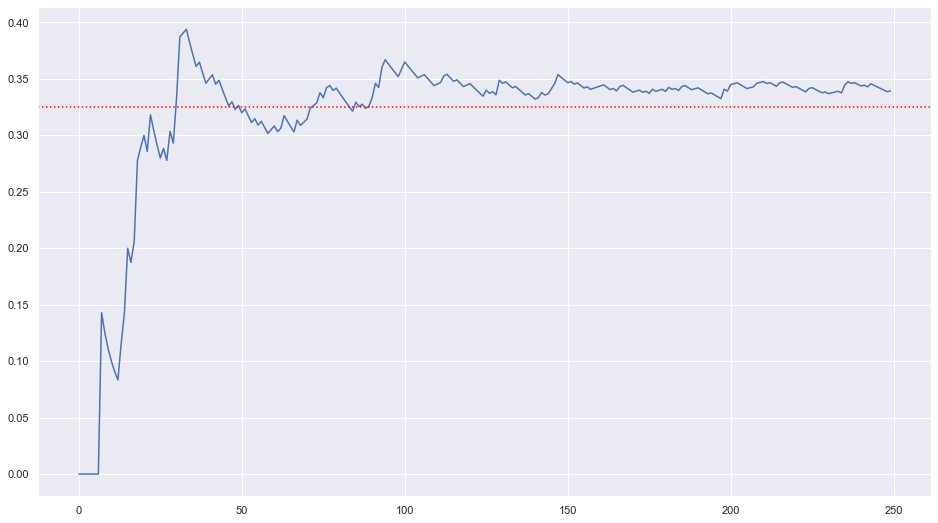

In [24]:
success = 0
freqs = []
t0 = time()
for i in tqdm(range(5000000)):
    if "".join(np.random.choice(letters, 3, replace=False)) == "ЗПШ":
        success += 1
    
    if i % 20000 == 0:
        freqs.append(success*1e4 / (i+1))

t1 = time()
print(f"Расчет завершен за {t1-t0:.1f} сек., {success} успешных событий найдено")

fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot([x for x in range(len(freqs))], freqs)
ax.axhline(10000/30720, color='red', ls='dotted')


## Еще пример: художественный текст.
Даже (казалось бы, простые) модели с равновероятными исходами могут быть удивительно полезными. Посмотрим:

In [19]:
with open("./w_and_p.txt", "r") as file:
    text = file.read()

In [20]:
text = text.lower()
text[:800]

"том i\n\nлев николаевич толстой\n\nвойна и мир\n\nтом 1\n\n\n\nчасть первая\n\n\n\ni\n\n—\xa0еh bien, mon prince. genes et lucques ne sont plus que des apanages, des поместья, de la famille buonaparte. non, je vous previens, que si vous ne me dites pas, que nous avons la guerre, si vous vous permettez encore de pallier toutes les infamies, toutes les atrocites de cet antichrist (ma parole, j'y crois) — je ne vous connais plus, vous n'etes plus mon ami, vous n'etes plus мой верный раб, comme vous dites. [ну, что, князь, генуа и лукка стали не больше, как поместьями фамилии бонапарте. нет, я вас предупреждаю, если вы мне не скажете, что у нас война, если вы еще позволите себе защищать все гадости, все ужасы этого антихриста (право, я верю, что он антихрист)\xa0— я вас больше не знаю, вы уж не друг мой, вы уж не м"

In [21]:
# freqs = dict()
o_freq = []
r_freq = []
t_freq = []
freqs = dict()

for i, c in enumerate(text):
    if c not in freqs.keys():
        freqs[c] = 1
    else:
        freqs[c] += 1
        
    if i % 1000 == 0 and 'о' in freqs.keys():
        o_freq.append(freqs['о'] / i)
        r_freq.append(freqs['р'] / i)
        t_freq.append(freqs['т'] / i)
        
o_freq.append(freqs['о'] / i)
r_freq.append(freqs['р'] / i)
t_freq.append(freqs['т'] / i)

freqs = {c: num/i for c,num in freqs.items() }
print(f"Обработано {i} символов")

Обработано 717477 символов


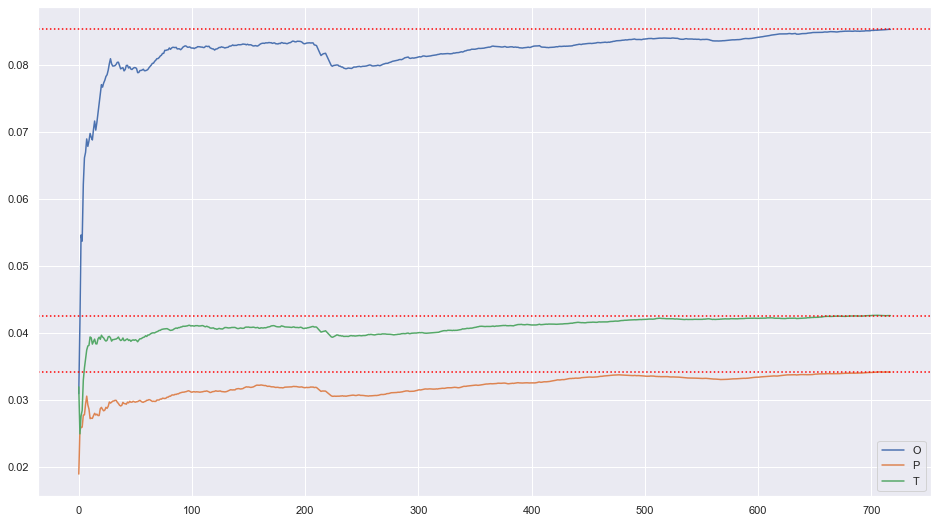

In [22]:
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot([x for x in range(len(o_freq))], o_freq, label="O")
sns.lineplot([x for x in range(len(o_freq))], r_freq, label="P")
sns.lineplot([x for x in range(len(o_freq))], t_freq, label="T")

ax.axhline(o_freq[-1], color='red', ls='dotted')
ax.axhline(r_freq[-1], color='red', ls='dotted')
ax.axhline(t_freq[-1], color='red', ls='dotted')

In [23]:
sorted(freqs.items(), key=lambda x: x[1], reverse=True)[:10]

[(' ', 0.1491434568634256),
 ('о', 0.08533932098171788),
 ('а', 0.06296508459504625),
 ('е', 0.05919632266957686),
 ('и', 0.04988173836931358),
 ('н', 0.048917247521523335),
 ('т', 0.04263551305477388),
 ('с', 0.039169199848915016),
 ('л', 0.03799703683881156),
 ('в', 0.03455720531807988)]

(ср. с ["Частотностью"](https://ru.wikipedia.org/wiki/%D0%A7%D0%B0%D1%81%D1%82%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C) в Wiki. Но это другая история, см. тж. [Теория кодирования](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F) и ["Криптография"](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D0%BF%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D1%8F)...). 

## В следующий раз:
- крокодилы и кролики, revised
- зависимые и независимые события
- условная вероятность
- тест на COVID как случайная величина, характеристики тестов.

**DISCORD ЗПШ:** `#05-2-z1-как-устроены-случайности`